In [1]:
import os
# Current working directory
notebook_directory = os.getcwd()
print(f"The notebook is running in: {notebook_directory}")

The notebook is running in: /Users/enriquecaballero/Documents/Python


In [2]:
import random
import math
import numpy as np
#
# Use numpy functions
print(np.sqrt(4))
print(np.log10(100))
print(np.log(100))
#
# Create numpy arrays
np_array1 = np.array([1, 2, 3], float)
print(np_array1)
np_array2 = np.array([[1, 2, 3], [1.0, 2.0, 3.0]], float)
print(np_array2)
#
# Assign the created array to a variable
a = np.array([[1, 2, 3], [1.0, 2.0, 3.0]], float)
print(a)

2.0
2.0
4.605170185988092
[1. 2. 3.]
[[1. 2. 3.]
 [1. 2. 3.]]
[[1. 2. 3.]
 [1. 2. 3.]]


In [12]:
# Initialize a vector of zeroes
nran = 10000
r_draw = np.zeros(nran, dtype='float')
#print(x.astype(int))
print('Initialize', r_draw[1])
#
np.random.seed(121)
for x in range(nran):
    r_draw[x] = np.random.normal(loc=0, scale=1)
#
# Created an array of size nran. Note that indexing is from 0 to nran-1
print(r_draw[nran - 1])
print(r_draw)
#
# Another way to generate the random array
np.random.seed(121)
r_draw_2 = np.random.normal(loc=0, scale=1, size=nran)
print(r_draw_2[nran - 1])

Initialize 0.0
0.03873690104410077
[-0.21203317 -0.28492917 -0.57389821 ... -1.41013742  0.96640135
  0.0387369 ]
0.03873690104410077


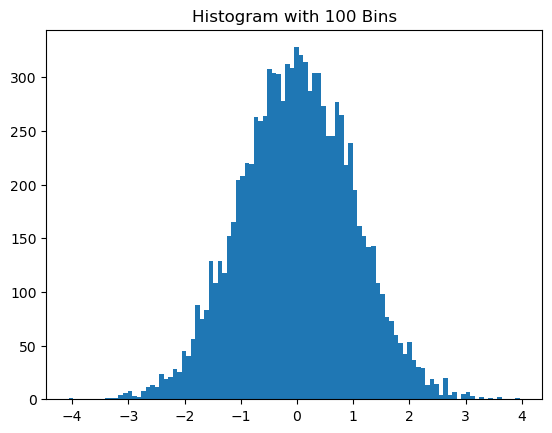

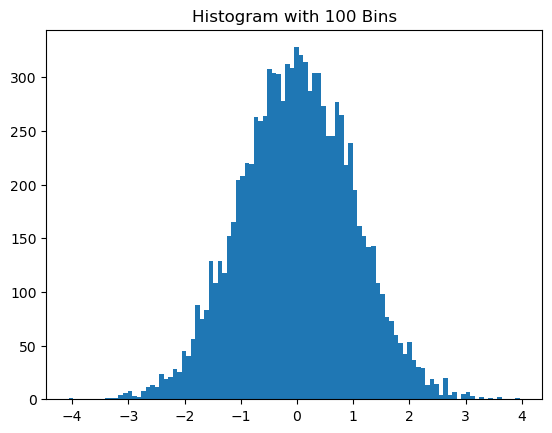

In [14]:
import matplotlib.pyplot as plt
# Plotting the histogram for r_draw
_ = plt.hist(r_draw, bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with 100 Bins")
plt.show()
# Plotting the histogram for r_draw_2
_ = plt.hist(r_draw_2, bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with 100 Bins")
plt.show()

10.366469932512294


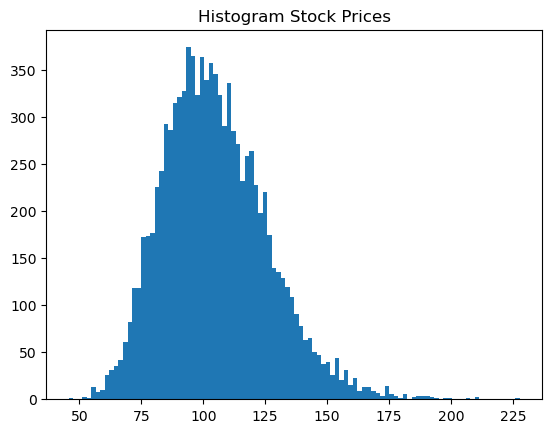

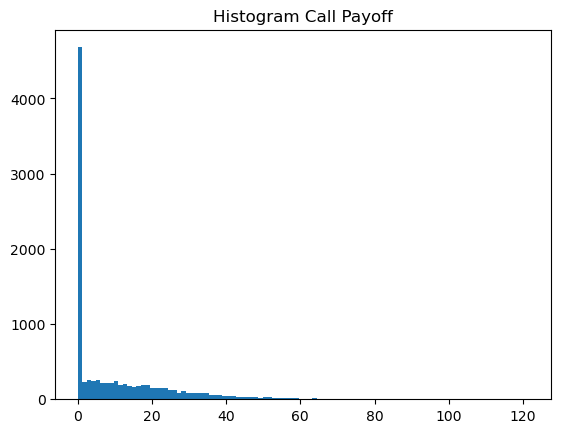

In [22]:
# Black-Scholes inputs
S0 = 100
K = 100
T = 1
Sigma = 0.2
r = 0.05
#
# One step
Nstep = 1
DeltaT = T / Nstep
stockp = np.zeros(nran, dtype='float')
payoff = np.zeros(nran, dtype='float')
pvpayoff = np.zeros(nran, dtype='float')
for x in range(nran):
    # Working on entering formula
    stockp[x] = S0 * math.exp((r * DeltaT - 0.5 * Sigma**2 * DeltaT) + (Sigma * DeltaT**0.5) * r_draw[x])
    if stockp[x] > K:
        payoff[x] = stockp[x] - K
    else:
        payoff[x] = 0.0
    # Take Present Value
    pvpayoff[x] = math.exp(-r * T) * payoff[x]
BSCall_MC = np.mean(pvpayoff)
print(BSCall_MC)
#
# Show histogram
_ = plt.hist(stockp, bins=100)  # arguments are passed to np.histogram
plt.title("Histogram Stock Prices")
plt.show()
_ = plt.hist(pvpayoff, bins=100)  # arguments are passed to np.histogram
plt.title("Histogram Call Payoff")
plt.show()